🔍 데이터 기본 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

📊 결측치 확인:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embark

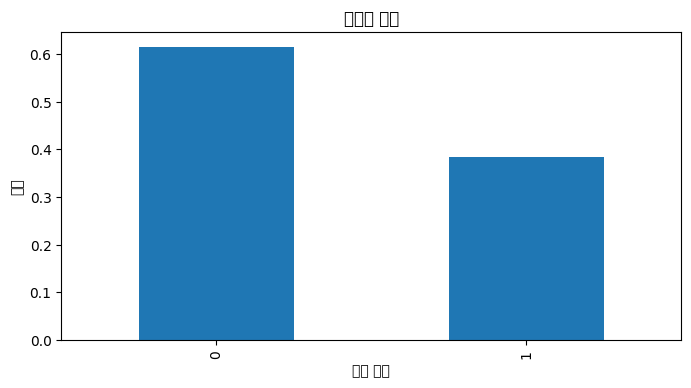

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    f1_score,
    precision_score,
    recall_score
)
import warnings
warnings.filterwarnings('ignore')

# 1. 데이터 로드
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

# 2. 기본 탐색 (EDA)
print("🔍 데이터 기본 정보:")
print(df.info())

print("\n📊 결측치 확인:")
print(df.isnull().sum())

# Survived 클래스 분포
survived_counts = df['Survived'].value_counts(normalize=True)
print("\n🚢 생존자 분포:")
print(survived_counts)

plt.figure(figsize=(8, 4))
survived_counts.plot(kind='bar')
plt.title('생존자 분포')
plt.xlabel('생존 여부')
plt.ylabel('비율')
plt.show()

In [20]:
from re import X
#3 전처리
#불필요한 컬럼 제거
df_processed = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

#결측치 처리
# Age: 중앙값 대체
df_processed['Age'] = df_processed['Age'].fillna(df_processed['Age'].median())

# Embarked: 최빈값 대체
df_processed['Embarked'] = df_processed['Embarked'].fillna(df_processed['Embarked'].mode()[0])

le = LabelEncoder()
df_processed['Sex'] = le.fit_transform(df_processed['Sex'])
df_processed['Embarked'] = le.fit_transform(df_processed['Embarked'])

# 특징 및 타겟 분리
X  = df_processed.drop('Survived', axis=1)
y = df_processed['Survived']

# 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


 로지스틱 회귀 성능 평가:
정확도: 0.7988826815642458
정밀도: 0.7796610169491526
재현율: 0.6666666666666666
F1 점수: 0.71875

혼동 행렬:
[[97 13]
 [23 46]]


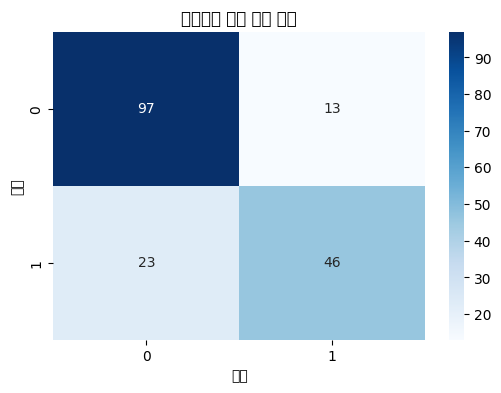


 가우시안 나이브 베이즈 성능 평가:
정확도: 0.7821229050279329
정밀도: 0.7272727272727273
재현율: 0.6956521739130435
F1 점수: 0.7111111111111111

혼동 행렬:
[[92 18]
 [21 48]]


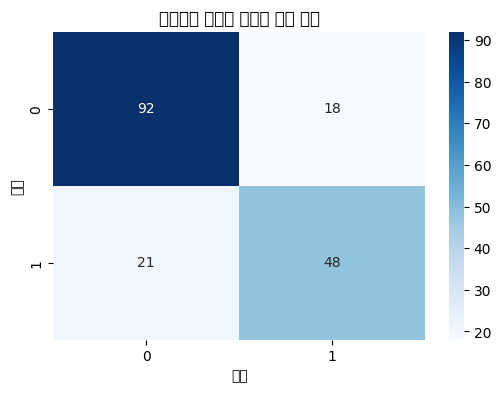

In [32]:
# 4. 모델 학습 및 평가
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n {model_name} 성능 평가:")
    print("정확도:", accuracy_score(y_true, y_pred))
    print("정밀도:", precision_score(y_true, y_pred))
    print("재현율:", recall_score(y_true, y_pred))
    print("F1 점수:", f1_score(y_true, y_pred))

    print("\n혼동 행렬:")
    cm = confusion_matrix(y_true, y_pred)
    print(cm)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} 혼동 행렬')
    plt.xlabel('예측')
    plt.ylabel('실제')
    plt.show()

# 로지스틱 회귀
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
evaluate_model(y_test, lr_pred, "로지스틱 회귀")

# 가우시안 나이브 베이즈
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
gnb_pred = gnb_model.predict(X_test)
evaluate_model(y_test, gnb_pred, "가우시안 나이브 베이즈")

In [34]:
# 5. 모델 비교
print("\n 모델 비교:")
print("로지스틱 회귀 정확도:", accuracy_score(y_test, lr_pred))
print("가우시안 나이브 베이즈 정확도:", accuracy_score(y_test, gnb_pred))

# 특징 중요도 (로지스틱 회귀)
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': np.abs(lr_model.coef_[0])
})
print("\n🌟 특징 중요도:")
print(feature_importance.sort_values('importance', ascending=False))


 모델 비교:
로지스틱 회귀 정확도: 0.7988826815642458
가우시안 나이브 베이즈 정확도: 0.7821229050279329

🌟 특징 중요도:
    feature  importance
1       Sex    1.283263
0    Pclass    0.891855
2       Age    0.494470
3     SibSp    0.275199
6  Embarked    0.182824
5      Fare    0.101712
4     Parch    0.079203


개선 아이디어로는 교차검증이나 시각화 추가 등이 있습니다